<a href="https://colab.research.google.com/github/linggaajiandika/introDL/blob/main/Pattern_Recognation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pattern Recognation**


### 1. Import Python Package


In [1]:
# tensorflow & keras
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
%tensorflow_version 2.x
from tensorflow import keras
from keras.layers import Dense,MaxPooling2D,AveragePooling2D
from keras.applications import MobileNetV2
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam,SGD,Adagrad,RMSprop

#keperluan plot
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from skimage import io
#Explore data & Directory
import pandas as pd
import numpy as np
import os
from google.colab import files
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### 2. Load Dataset


In [2]:
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
#Sumber
source = data_dir
# Destinasi
destination = '/content'
 # Pindahkan folder
data_dir = shutil.move(source, destination) 

228818944/228813984 [==============================] - 1s 0us/step


### 3. Explore data gambar



Text(0.5, 1.0, 'gambar resize')

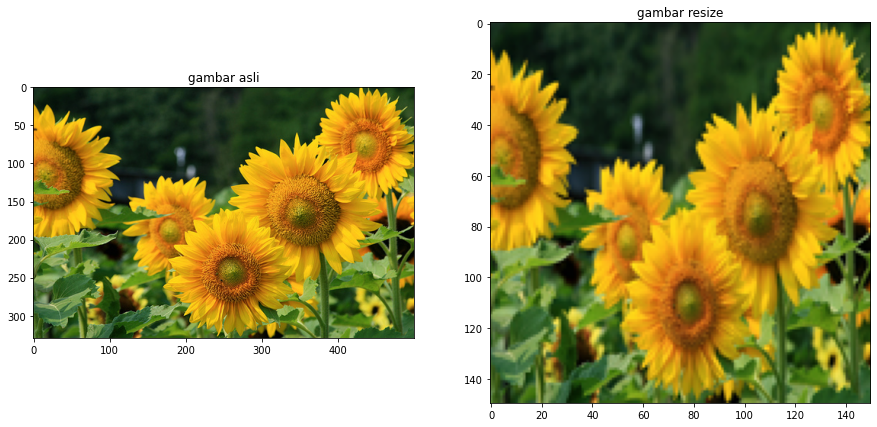

In [3]:
img = Image.open('/content/flower_photos/sunflowers/1008566138_6927679c8a.jpg')
imgrez=img.resize((150,150))
fig = plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("gambar asli")
plt.subplot(1,2,2)
plt.imshow(imgrez)
plt.title("gambar resize")

In [4]:
img =io.imread('/content/flower_photos/sunflowers/1008566138_6927679c8a.jpg')
print("original image:")
print('Type of the image : ' , type(img))
print('Image size {}'.format(img.size))
print('Shape of the image : {}'.format(img.shape))
print('Image Hight {}'.format(img.shape[0]))
print('Image Width {}'.format(img.shape[1]))
print('Dimension of Image {}'.format(img.ndim))


original image:
Type of the image :  <class 'numpy.ndarray'>
Image size 495000
Shape of the image : (330, 500, 3)
Image Hight 330
Image Width 500
Dimension of Image 3


In [5]:
print('Maximum RGB value in this image {}'.format(img.max()))
print('Minimum RGB value in this image {}'.format(img.min()))

Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [6]:
print("original image:")
print('Value of only R channel {}'.format(img[ 0, 0, 2]))
print('Value of only G channel {}'.format(img[ 0, 0, 1]))
print('Value of only B channel {}'.format(img[ 0, 0, 0]))

original image:
Value of only R channel 42
Value of only G channel 49
Value of only B channel 34


In [7]:
usecols=[0,1,2,3,4]
print('R Channel Only')
redcol=img[ :, :, 2]
np.savetxt("redcol.csv", redcol, delimiter=",")
dfred = pd.read_csv("redcol.csv",header=None, usecols=usecols)
pd.options.display.float_format = '{:,.0f}'.format
dfred.head()

R Channel Only


,0,1,2,3,4
0,42,39,39,40,39
1,40,37,37,39,39
2,38,35,36,38,39
3,33,32,35,38,37
4,30,31,32,34,35


In [8]:
print('G Channel Only')
grcol=img[ :, :, 1]
np.savetxt("grcol.csv", grcol, delimiter=",")
dfgreen = pd.read_csv("grcol.csv",header=None, usecols=usecols)
pd.options.display.float_format = '{:,.0f}'.format
dfgreen.head()

G Channel Only


,0,1,2,3,4
0,49,49,51,52,51
1,48,47,49,51,51
2,46,45,48,50,50
3,44,44,47,51,50
4,42,44,48,50,48


In [9]:
print('B Channel Only')
blcol=img[ :, :, 0]
np.savetxt("bluecol.csv", blcol, delimiter=",")
dfblue = pd.read_csv("bluecol.csv",header=None, usecols=usecols)
pd.options.display.float_format = '{:,.0f}'.format
dfblue.head()

B Channel Only


,0,1,2,3,4
0,34,33,33,34,33
1,31,30,31,33,31
2,29,28,28,30,30
3,24,24,27,29,28
4,22,22,25,27,26


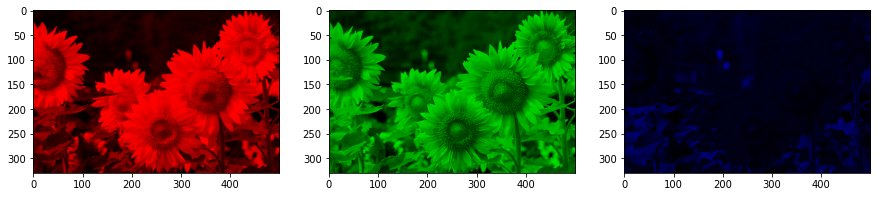

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(img.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = img[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)

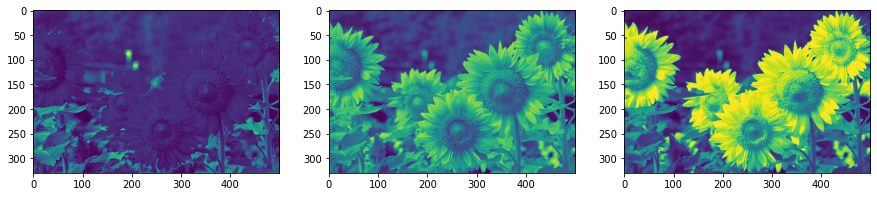

In [11]:
#Contrast dari gambar
fig = plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.imshow(img[ : , : , 2])
plt.subplot(1,3,2)
plt.imshow(img[ : , : , 1])
plt.subplot(1,3,3)
plt.imshow(img[ : , : , 0])


### 4. Preprocessing data


In [12]:
sun_dir= os.listdir('flower_photos/sunflowers')
rose_dir= os.listdir('flower_photos/roses')

In [13]:
sun_dir

['14266917699_91b207888e.jpg',
 '197011740_21825de2bf.jpg',
 '19508264965_d1dfb565ea_n.jpg',
 '5967284308_85714d8cf7_m.jpg',
 '20777358950_c63ea569a1.jpg',
 '22686342422_c0b9e2f38e.jpg',
 '9588522189_db6166f67f.jpg',
 '6199086734_b7ddc65816_m.jpg',
 '3922005347_7b6fb82fcd.jpg',
 '7270375648_79f0caef42_n.jpg',
 '23204123212_ef32fbafbe.jpg',
 '2678588376_6ca64a4a54_n.jpg',
 '151898652_b5f1c70b98_n.jpg',
 '15054753070_4f6ae0e763_m.jpg',
 '5923085891_27617463fe.jpg',
 '10386522775_4f8c616999_m.jpg',
 '164668737_aeab0cb55e_n.jpg',
 '7586498522_4dcab1c8d2_m.jpg',
 '3311874685_7b9ef10f7e_m.jpg',
 '1240624822_4111dde542.jpg',
 '5139977579_ea2dd6a322_m.jpg',
 '9246304620_768d1f54d7_n.jpg',
 '4271193206_666ef60aa0_m.jpg',
 '4933230247_a0432f01da.jpg',
 '5020805135_1219d7523d.jpg',
 '19349582128_68a662075e_n.jpg',
 '6198569587_23c3693328_m.jpg',
 '6606746467_a668c8d417.jpg',
 '3840761441_7c648abf4d_n.jpg',
 '20022771089_3cc7e5086d_m.jpg',
 '20658775992_1619cd0a9b_n.jpg',
 '7804213238_1d92ae5edb_m

In [14]:
sun_train,sun_test = train_test_split(sun_dir, test_size=0.2, random_state=1)
sun_test, sun_val = train_test_split(sun_test, test_size=0.5, random_state=1)

rose_train, rose_test = train_test_split(rose_dir, test_size=0.2, random_state=1)
rose_test, rose_val = train_test_split(rose_test, test_size=0.5, random_state=1)

In [15]:
print("sunflower training data: " + str(len(sun_train)))
print("rose training data: "+ str(len(rose_train)))
print('')
print("sunflower validation data: "+ str(len(sun_val)))
print("srose validation data: "+str(len(rose_val)))
print('')
print("sunflower test data: "+str(len(sun_test)))
print("rose test data: "+str(len(rose_test)))

sunflower training data: 559
rose training data: 512

sunflower validation data: 70
srose validation data: 65

sunflower test data: 70
rose test data: 64


In [16]:
# Membuat directory atau folder pemisah gambar
os.makedirs('data/train/sun')
os.makedirs('data/train/rose')

os.makedirs('data/test/sun')
os.makedirs('data/test/rose')

os.makedirs('data/val/sun')
os.makedirs('data/val/rose')

In [17]:
#Memidahkan secara otomatis list gambar ke folder masing2 tanpa manual

#train
for f in sun_train:
  shutil.move('flower_photos/sunflowers/'+f, 'data/train/sun')
for f in rose_train:
  shutil.move('flower_photos/roses/'+f, 'data/train/rose')


In [18]:
#val

for f in sun_val:
  shutil.move('flower_photos/sunflowers/'+f, 'data/val/sun')
for f in rose_val:
  shutil.move('flower_photos/roses/'+f, 'data/val/rose')


In [19]:
# test
for f in sun_test:
  shutil.move('flower_photos/sunflowers/'+f, 'data/test/sun')
for f in rose_test:
  shutil.move('flower_photos/roses/'+f, 'data/test/rose')

In [20]:
train_dir = os.path.join('/content/data/train')
val_dir = os.path.join('/content/data/val')
test_dir = os.path.join('/content/data/test')

### 5. Generate data

In [21]:
image_size = 224 # Semua gambar diubah kedalam 224 *224
batch_size = 32

# ubah semua kode gambar dari 0-255 menjadi 0-1 (berfungsi untuk standarisasi dari data)
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)
                # featurewise_center=True,
                # featurewise_std_normalization=True,
                # rotation_range=20,
                # width_shift_range=0.2,
                # height_shift_range=0.2,
                # horizontal_flip=True)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

# Generate data gambar menjadi array
train_generator = train_datagen.flow_from_directory(
                train_dir,  
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
                val_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')


test_generator = test_datagen.flow_from_directory(
                test_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                shuffle=False, #mempermudah saat nanti klasifikasi mengunakan sklearn
                class_mode='binary')

Found 1071 images belonging to 2 classes.
Found 135 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [22]:
len(os.listdir('/content/data/val/rose'))

65

### 6. Build Model


In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Early stopping dibutuhkan ketika epochs mulai konvergen tetapi belum mencapai batas epochs maksimal
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode="auto") 

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['BinaryAccuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

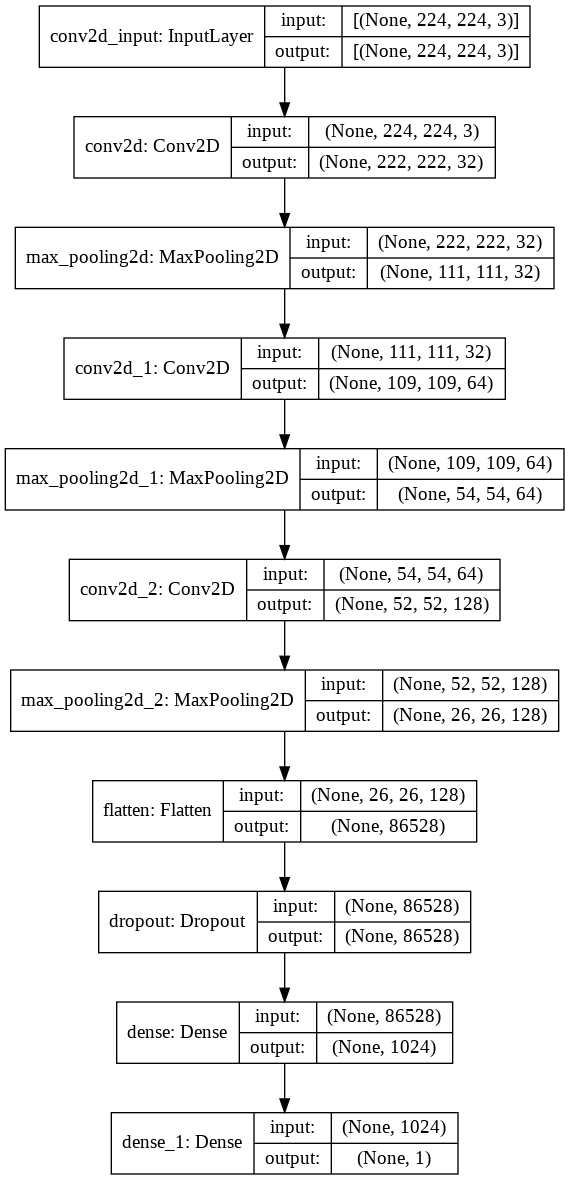

In [24]:
#Plot model
keras.utils.plot_model(model, "arsitektur_model.png", show_shapes=True)

In [25]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,validation_data=validation_generator,
                              epochs=epochs,shuffle=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
33/33 [==============================] - 39s 160ms/step - loss: 3.2472 - binary_accuracy: 0.5924 - val_loss: 0.8203 - val_binary_accuracy: 0.9259
Epoch 2/10
33/33 [==============================] - 5s 140ms/step - loss: 0.8590 - binary_accuracy: 0.8313 - val_loss: 0.4070 - val_binary_accuracy: 0.9259
Epoch 3/10
33/33 [==============================] - 5s 138ms/step - loss: 0.4498 - binary_accuracy: 0.9042 - val_loss: 0.4189 - val_binary_accuracy: 0.8815
Epoch 4/10
33/33 [==============================] - 5s 139ms/step - loss: 0.3834 - binary_accuracy: 0.8876 - val_loss: 0.2919 - val_binary_accuracy: 0.8963
Epoch 5/10
33/33 [==============================] - 5s 138ms/step - loss: 0.3118 - binary_accuracy: 0.8955 - val_loss: 0.2190 - val_binary_accuracy: 0.9556
Epoch 6/10
33/33 [==============================] - 5s 138ms/step - loss: 0.2462 - binary_accuracy: 0.9286 - val_loss: 0.1991 - val_binary_accuracy: 0.9556
Epoch 7/10
33/33 [==============================] - 5s 138ms/st

In [26]:
history.history

{'binary_accuracy': [0.7092803120613098,
  0.8522727489471436,
  0.8929924368858337,
  0.8948863744735718,
  0.9053030014038086,
  0.9232954382896423,
  0.9232954382896423,
  0.9157196879386902,
  0.9299242496490479,
  0.9403409361839294],
 'loss': [1.9845467805862427,
  0.7122924327850342,
  0.4416166841983795,
  0.3642869293689728,
  0.29381880164146423,
  0.26605653762817383,
  0.27755269408226013,
  0.27968084812164307,
  0.22128890454769135,
  0.22694064676761627],
 'val_binary_accuracy': [0.9259259104728699,
  0.9259259104728699,
  0.8814814686775208,
  0.8962963223457336,
  0.9555555582046509,
  0.9555555582046509,
  0.9629629850387573,
  0.9629629850387573,
  0.970370352268219,
  0.9555555582046509],
 'val_loss': [0.8202828764915466,
  0.4070238173007965,
  0.41890832781791687,
  0.29187506437301636,
  0.2190193235874176,
  0.1990751326084137,
  0.25562334060668945,
  0.19091510772705078,
  0.1678929179906845,
  0.22955410182476044]}

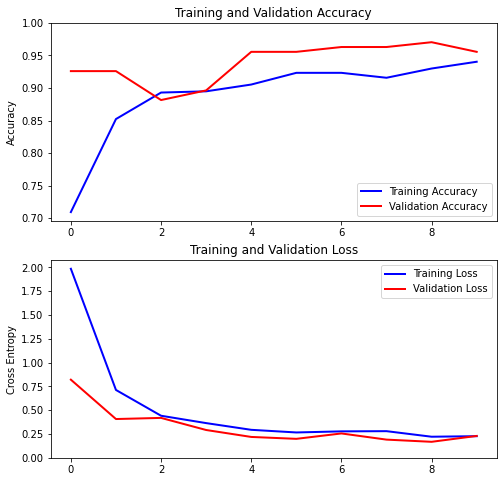

In [27]:
acc = history.history['binary_accuracy']
val_acc =history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy',color='b', linewidth= 2)
plt.plot(val_acc, label='Validation Accuracy',color='r', linewidth= 2)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss',color='b', linewidth= 2)
plt.plot(val_loss, label='Validation Loss',color='r', linewidth= 2)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [28]:
model.save('model.h5')

### 7. Test data: Classification

In [30]:
#Test data
model.evaluate(test_generator)
pred=model.predict_classes(test_generator,batch_size=None)
y_pred=np.array([0]*70+[1]*64)

5/5 [==============================] - 1s 137ms/step - loss: 0.2461 - binary_accuracy: 0.9254


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
# Confusion Matrix
target_names = ['sunflowers','roses']
print(classification_report(y_pred,pred, target_names=target_names))

              precision    recall  f1-score   support

  sunflowers       0.94      0.89      0.91        70
       roses       0.88      0.94      0.91        64

    accuracy                           0.91       134
   macro avg       0.91      0.91      0.91       134
weighted avg       0.91      0.91      0.91       134



Confusion matrix, without normalization
[[62  8]
 [ 4 60]]


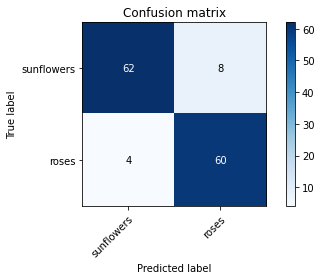

In [32]:
# Klasifikasi data test
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[:2]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_pred, pred, classes=['sunflowers','roses'],
                      title='Confusion matrix')

plt.show()

### 8. Test Data: Predicting

In [35]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(fn)
  print(classes)

Saving jcr_content.jpeg to jcr_content.jpeg
jcr_content.jpeg
[[0.]]
